In [65]:
 # Dependencies and Setup
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from scipy.stats import pearsonr
from textwrap import wrap

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [43]:
citylat = np.random.uniform(low=-90.0, high=90.0, size=1200)
citylng = np.random.uniform(low=-180.0, high=180.0, size=1200)

#Creating randomly distributed coordinate pairs for lat and lng

coordinates = []
coordinates = list(zip(citylat, citylng))

#List to store coordinates, zip lat & lng to create the pair
#List to store the cities

cities = []

for pair in coordinates:
    city = citipy.nearest_city(pair[0], pair[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)
    
#Length of the cities list changes according to the random fuction, does it have a lower bound?


555

In [44]:
weatherurl = f"http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{weatherurl}appid={weather_api_key}&units={units}&q="

city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
tempdata = []
humiditydata = []
cloudsdata = []
wind_speeddata = []


for city in cities:
    response_json = requests.get(query_url + city).json()
    
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        tempdata.append(temp)

        humidity = response_json['main']['humidity']
        humiditydata.append(humidity)

        clouds = response_json['clouds']['all']
        cloudsdata.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speeddata.append(wind_speed)
        
        print(f"City Name: {city}, City ID: {city_id}")

        
    except:
        
        print("Request be bunk yo")
            

    


City Name: riyadh, City ID: 108410
City Name: okhotsk, City ID: 2122605
City Name: mount isa, City ID: 2065594
Request be bunk yo
City Name: rikitea, City ID: 4030556
City Name: rivers, City ID: 6122707
City Name: saint-philippe, City ID: 935215
City Name: fairbanks, City ID: 5861897
City Name: atuona, City ID: 4020109
City Name: puerto ayora, City ID: 3652764
City Name: zwedru, City ID: 2272491
City Name: mataura, City ID: 6201424
City Name: qena, City ID: 350550
City Name: jamestown, City ID: 5122534
City Name: oktyabrskiy, City ID: 515879
City Name: yellowknife, City ID: 6185377
City Name: bubaque, City ID: 2374583
City Name: lagoa, City ID: 3372964
Request be bunk yo
City Name: ushuaia, City ID: 3833367
City Name: albany, City ID: 5106841
City Name: fertorakos, City ID: 3052640
Request be bunk yo
City Name: monroe, City ID: 5127305
City Name: kodiak, City ID: 5866583
City Name: bluff, City ID: 2206939
City Name: ottumwa, City ID: 4870380
City Name: coro, City ID: 3645213
City Name:

In [46]:
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Latitude": lat_list, "Longitude": lng_list,
                         "Temperature": tempdata, "Humidity": humiditydata, "Clouds": cloudsdata,
                         "Wind Speed": wind_speeddata})

cities_df = cities_df.set_index("City ID")
cities_df.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Clouds,Wind Speed
City ID,,,,,,,,
108410,Riyadh,SA,24.6877,46.7219,62.74,24,4,13.15
2122605,Okhotsk,RU,59.3833,143.3000,7.92,77,100,5.46
2065594,Mount Isa,AU,-20.7333,139.5000,89.37,23,0,10.36
4030556,Rikitea,PF,-23.1203,-134.9692,79.56,71,63,15.61
6122707,Rivers,CA,50.0308,-100.2403,34.75,91,100,16.49


In [47]:
cities_df = cities_df.reset_index()
#Reset index for CSV writing

In [48]:
cities_df.to_csv("city_weather.csv", index=False, header=True)

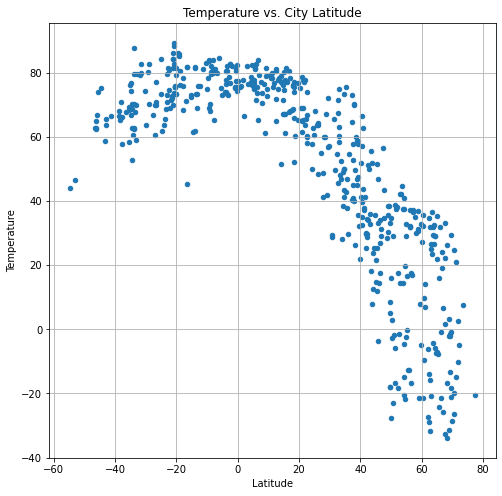

In [49]:
cities_df.plot(kind="scatter", x="Latitude", y="Temperature", grid=True, figsize=(8,8), 
               title="Temperature vs. City Latitude")

plot.show()


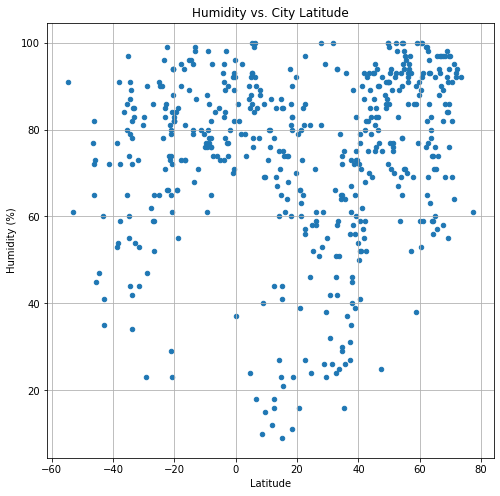

In [50]:

cities_df.plot(kind="scatter", x="Latitude", y="Humidity", grid=True, figsize=(8,8), 
               title="Humidity vs. City Latitude")

plot.ylabel('Humidity (%)')
plot.show()


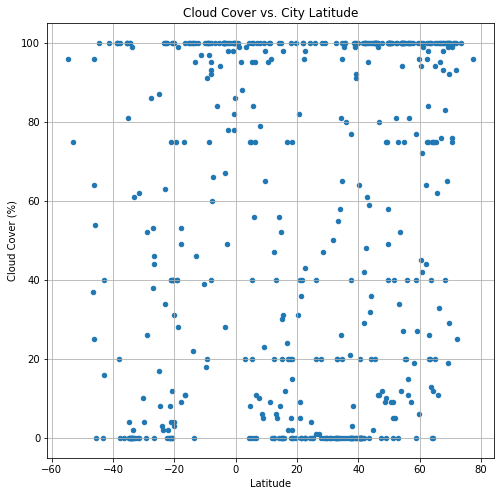

In [51]:
cities_df.plot(kind="scatter", x="Latitude", y="Clouds", grid=True, figsize=(8,8), 
               title="Cloud Cover vs. City Latitude")

plot.ylabel('Cloud Cover (%)')
plot.show()


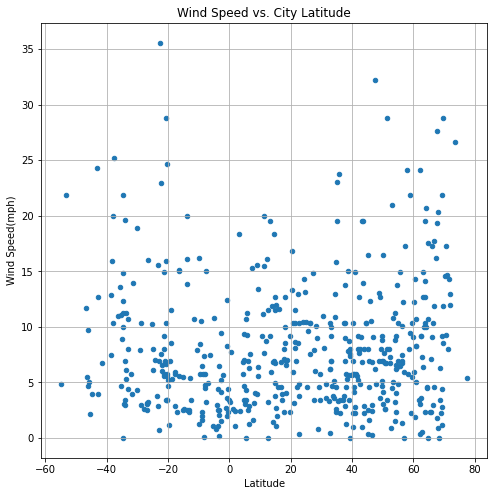

In [52]:
cities_df.plot(kind="scatter", x="Latitude", y="Wind Speed",grid=True, figsize=(8,8), 
               title="Wind Speed vs. City Latitude")

plot.ylabel('Wind Speed(mph)')
plot.show()


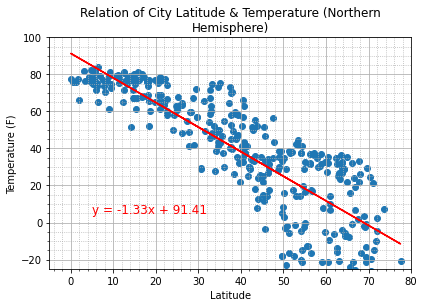

The r-squared is: 0.7224400636873736


In [87]:
filter = cities_df['Latitude'] > 0
northern_hemi = cities_df[filter]
southern_hemi = cities_df[~filter]

x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = pearsonr(x_values, y_values)

plot.scatter(x_values,y_values)
plot.plot(x_values,regress_values,"r-")
plot.annotate(line_eq,(5,5),fontsize=12,color="red")
plot.xlabel('Latitude')
plot.ylabel('Temperature (F)')
plot.ylim(-25, 100)
plot.xlim(-5, 80)
plot.minorticks_on()
plot.grid(which='major', linestyle='-')
plot.grid(which='minor', linestyle=':')
plot.tight_layout()

plot.title("\n".join(wrap("Relation of City Latitude & Temperature (Northern Hemisphere)", 60)))
plot.show()
print(f"The r-squared is: {rvalue**2}")

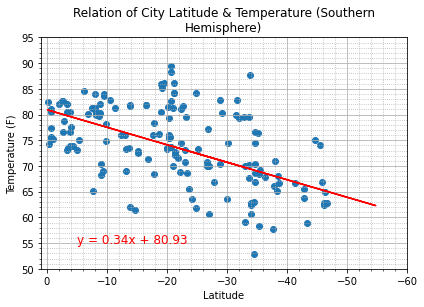

The r-squared is: 0.28438229244228547


In [93]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = pearsonr(x_values, y_values)

plot.scatter(x_values,y_values)
plot.plot(x_values,regress_values,"r-")
plot.annotate(line_eq,(-5,55),fontsize=12,color="red")
plot.xlabel('Latitude')
plot.ylabel('Temperature (F)')
plot.ylim(50, 95)
plot.xlim(1, -60)
plot.minorticks_on()
plot.grid(which='major', linestyle='-')
plot.grid(which='minor', linestyle=':')
plot.tight_layout()

plot.title("\n".join(wrap("Relation of City Latitude & Temperature (Southern Hemisphere)", 60)))
plot.show()
print(f"The r-squared is: {rvalue**2}")


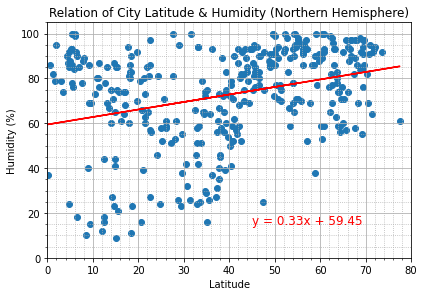

The r-squared is: 0.09635317341173456


In [130]:
filter = cities_df['Latitude'] > 0
northern_hemi = cities_df[filter]
southern_hemi = cities_df[~filter]

x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = pearsonr(x_values, y_values)

plot.scatter(x_values,y_values)
plot.plot(x_values,regress_values,"r-")
plot.annotate(line_eq,(45,15),fontsize=12,color="red")
plot.xlabel('Latitude')
plot.ylabel('Humidity (%)')
plot.ylim(0, 105)
plot.xlim(0, 80)
plot.minorticks_on()
plot.grid(which='major', linestyle='-')
plot.grid(which='minor', linestyle=':')
plot.tight_layout()

plot.title("\n".join(wrap("Relation of City Latitude & Humidity (Northern Hemisphere)", 60)))
plot.show()
print(f"The r-squared is: {rvalue**2}")

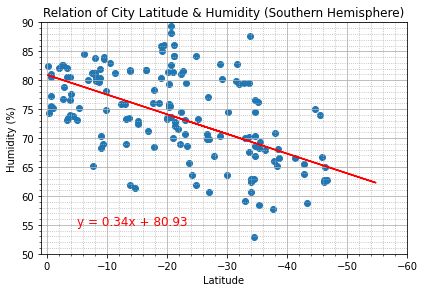

The r-squared is: 0.28438229244228547


In [91]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = pearsonr(x_values, y_values)

plot.scatter(x_values,y_values)
plot.plot(x_values,regress_values,"r-")
plot.annotate(line_eq,(-5,55),fontsize=12,color="red")
plot.xlabel('Latitude')
plot.ylabel('Humidity (%)')
plot.ylim(50, 90)
plot.xlim(1, -60)
plot.minorticks_on()
plot.grid(which='major', linestyle='-')
plot.grid(which='minor', linestyle=':')
plot.tight_layout()

plot.title("\n".join(wrap("Relation of City Latitude & Humidity (Southern Hemisphere)", 60)))
plot.show()
print(f"The r-squared is: {rvalue**2}")

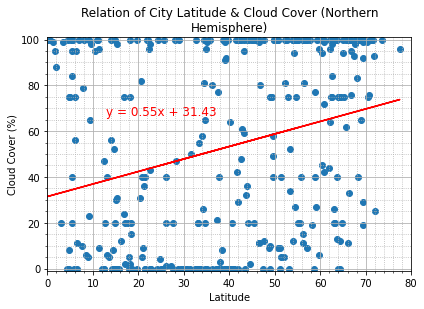

The r-squared is: 0.06911812281033484


In [101]:
filter = cities_df['Latitude'] > 0
northern_hemi = cities_df[filter]
southern_hemi = cities_df[~filter]

x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = pearsonr(x_values, y_values)

plot.scatter(x_values,y_values)
plot.plot(x_values,regress_values,"r-")
plot.annotate(line_eq,(13,67),fontsize=12,color="red")
plot.xlabel('Latitude')
plot.ylabel('Cloud Cover (%)')
plot.ylim(-1, 101)
plot.xlim(0, 80)
plot.minorticks_on()
plot.grid(which='major', linestyle='-')
plot.grid(which='minor', linestyle=':')
plot.tight_layout()

plot.title("\n".join(wrap("Relation of City Latitude & Cloud Cover (Northern Hemisphere)", 60)))
plot.show()
print(f"The r-squared is: {rvalue**2}")

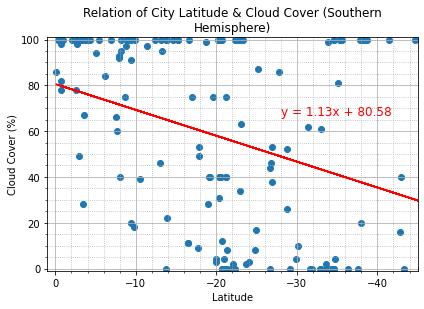

The r-squared is: 0.13390932597875727


In [131]:
filter = cities_df['Latitude'] > 0
northern_hemi = cities_df[filter]
southern_hemi = cities_df[~filter]

x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = pearsonr(x_values, y_values)

plot.scatter(x_values,y_values)
plot.plot(x_values,regress_values,"r-")
plot.annotate(line_eq,(-28,67),fontsize=12,color="red")
plot.xlabel('Latitude')
plot.ylabel('Cloud Cover (%)')
plot.ylim(-1, 101)
plot.xlim(1, -45)
plot.minorticks_on()
plot.grid(which='major', linestyle='-')
plot.grid(which='minor', linestyle=':')
plot.tight_layout()

plot.title("\n".join(wrap("Relation of City Latitude & Cloud Cover (Southern Hemisphere)", 60)))
plot.show()
print(f"The r-squared is: {rvalue**2}")

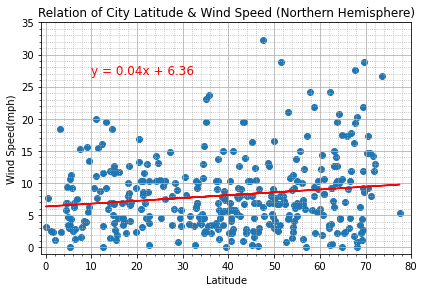

The r-squared is: 0.024702577353571623


In [120]:
filter = cities_df['Latitude'] > 0
northern_hemi = cities_df[filter]
southern_hemi = cities_df[~filter]

x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = pearsonr(x_values, y_values)

plot.scatter(x_values,y_values)
plot.plot(x_values,regress_values,"r-")
plot.annotate(line_eq,(10,27),fontsize=12,color="red")
plot.xlabel('Latitude')
plot.ylabel('Wind Speed(mph)')
plot.ylim(-1, 35)
plot.xlim(-1, 80)
plot.minorticks_on()
plot.grid(which='major', linestyle='-')
plot.grid(which='minor', linestyle=':')
plot.tight_layout()

plot.title("\n".join(wrap("Relation of City Latitude & Wind Speed (Northern Hemisphere)", 60)))
plot.show()
print(f"The r-squared is: {rvalue**2}")

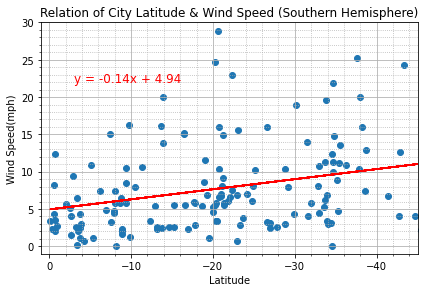

The r-squared is: 0.08343495328378134


In [129]:

x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = pearsonr(x_values, y_values)

plot.scatter(x_values,y_values)
plot.plot(x_values,regress_values,"r-")
plot.annotate(line_eq,(-3,22),fontsize=12,color="red")
plot.xlabel('Latitude')
plot.ylabel('Wind Speed(mph)')
plot.ylim(-1, 30)
plot.xlim(1, -45)
plot.minorticks_on()
plot.grid(which='major', linestyle='-')
plot.grid(which='minor', linestyle=':')
plot.tight_layout()

plot.title("\n".join(wrap("Relation of City Latitude & Wind Speed (Southern Hemisphere)", 60)))
plot.show()
print(f"The r-squared is: {rvalue**2}")